In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import sklearn
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Get some data to work with
df_org = pd.read_csv('fbi_data_2013.csv')
df_org.columns = ['City','Population','Violent crime','Murder','Rape1','Rape2','Robbery','Agg_Assault','Prop_Crime','Burglary','Larceny','MV Theft','Arson3']
df_org.fillna(0, inplace=True)

In [3]:
# Seen this data before, eliminate mostly empty data columns and stratify New York out of the equation
data = df_org[['City','Population','Violent crime','Murder','Rape2','Robbery','Agg_Assault','Prop_Crime','Burglary','Larceny','MV Theft']][df_org['City']!= "New York"]


Coefficients: 
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.80966353e-14 -1.91513472e-14 -1.93178806e-14 -2.10109707e-14]

Intercept: 
 4.618527782440651e-13

R-squared:
1.0


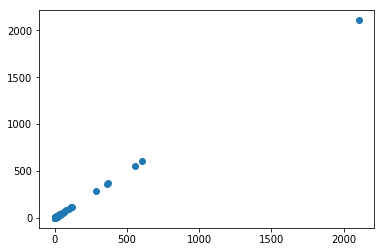

In [4]:
# Get the data setup and split into training and test sets
X = data[['Murder','Rape2','Robbery','Agg_Assault','Prop_Crime','Burglary','Larceny','MV Theft']]
y = data['Violent crime']
# Let's put 30% of the data into the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# OLS prediction for violent crime
regr = LinearRegression()
regr.fit(X_train,y_train)
predictions = regr.predict(X_test)
plt.scatter(y_test,predictions)

# Inspect the results.
regr.fit(X,y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))

In [5]:
# Wow!  That's crazy.  You would expect only the Murder, Rape and Assault to support Violent Crime


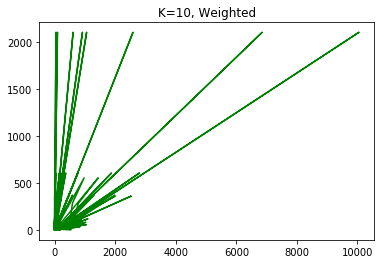

Weighted Accuracy: 0.52 (+/- 0.36)


In [8]:
# KNN prediction for Violent crime

knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X, y)

# Get prediction for test data
Y_ = knn.predict(X_test)

plt.plot(X_test, Y_, c='g', label='prediction')
plt.title('K=10, Weighted')
plt.show()
score = cross_val_score(knn, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

In [7]:
# OLS appears to be the better predictor in this case.  The higher the number of features to be analyzed, the
# less efficient KNN will be.  Further, due to some degree of linearity in the relationships of the variables,
# the parametric method of linear regression, which bases it's predictions on a forced linearity of the variables,
# is more suitable in this case.  The data would most likely need to be scaled to better allow KNN to work most
# effectively
